## Analyse exploratoire et nettoyage de `title.ratings`

### Introduction
Les étapes suivantes visent à analyser, nettoyer et préparer la table `title.ratings` pour une utilisation ultérieure. 
Nous allons examiner chaque colonne, effectuer les transformations nécessaires et proposer des recommandations pour les prochaines étapes.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### Étape 1 : Chargement des données

In [3]:
# Importation du DataSet :
df_title_ratings = pd.read_csv('../gitignore/title.ratings.tsv', sep= '\t')


- #### Aperçu rapide des données

In [4]:
df_title_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497921 entries, 0 to 1497920
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1497921 non-null  object 
 1   averageRating  1497921 non-null  float64
 2   numVotes       1497921 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.3+ MB


### Étape 2 : Informations générales sur les données

- #### Aperçu rapide des données

In [5]:
df_title_ratings.head()


,tconst,averageRating,numVotes
0,tt0000001,5.7,2100
1,tt0000002,5.6,282
2,tt0000003,6.5,2118
3,tt0000004,5.4,182
4,tt0000005,6.2,2850


- #### Identification des valeurs manquantes

In [6]:
df_title_ratings.isna().sum()


tconst           0
averageRating    0
numVotes         0
dtype: int64

- #### Identification des doublons

In [7]:
df_title_ratings.duplicated().sum()


0

- #### Identification des valeurs non numériques dans les colonnes 'averageRating' et 'numVotes'

In [8]:
#Uniquement des valeurs numériques pour la colonne 'averageRating'
df_title_ratings[df_title_ratings['averageRating'].apply(pd.to_numeric, errors='coerce').isna()]


,tconst,averageRating,numVotes


In [9]:
#Uniquement des valeurs numériques pour la colonne 'numVotes'
df_title_ratings[df_title_ratings['numVotes'].apply(pd.to_numeric, errors='coerce').isna()]


,tconst,averageRating,numVotes


**Aucun nettoyage n'est nécessaire sur cette table.**

### Étape 3 : Exploration et analyse graphique

In [10]:
df_title_ratings.describe()


,averageRating,numVotes
count,1.497921e+06,1.497921e+06
mean,6.955228e+00,1.028636e+03
std,1.385758e+00,1.776148e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.200000e+00,2.600000e+01
75%,7.900000e+00,1.000000e+02
max,1.000000e+01,2.961164e+06


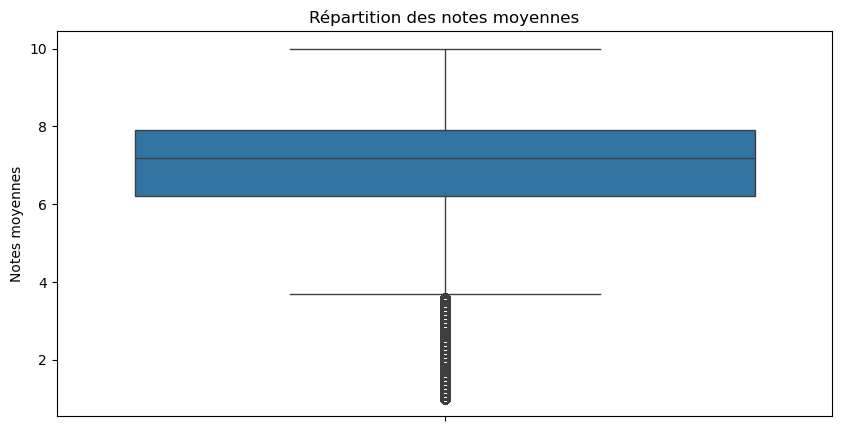

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_title_ratings['averageRating'])
plt.title("Répartition des notes moyennes")
plt.ylabel("Notes moyennes")
plt.show()


**Recommandation : Pour garder proposer un système de recommandation intéressant, il serait bon de garder les notes supérieures à 7.2 (médiane), qui est une note correcte et nous laisserait la moitié de la table à utiliser. A comparer avec les notation de la table `tmdb_full`pour vérifier qu'il n'y a pas de valeurs aberrantes dans les notations.**